# TSF Task 1 

## Saif Ali Athyaab


### **Simple Linear Regression**

It is one of the most widely known modeling technique. Linear regression is usually among the first few topics which people pick while learning predictive modeling. In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear.

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

![](https://districtadministration.com/wp-content/uploads/2020/02/Grading.png)

In this case we'll be analysing student scores and predicting a student's percentage based on the amount of hours spent studying. It's just a 1 variable linear rergession model.

Y=ax +b
Y -> score we are getting
x -> No. of study hours
a, b -> constants

In [63]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [64]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Printing student data")
df

Printing student data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [72]:
df.shape # prints the number of rows and columns

(25, 2)

In [70]:
df.describe() # prints the measures of central tendencey

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [76]:
df.isnull().any() # prints if any of the columns has a null value

Hours     False
Scores    False
dtype: bool

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

In [15]:
for style in plt.style.available:
    print(style)
plt.style.use('classic')

Solarize_Light2
_classic_test_patch
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


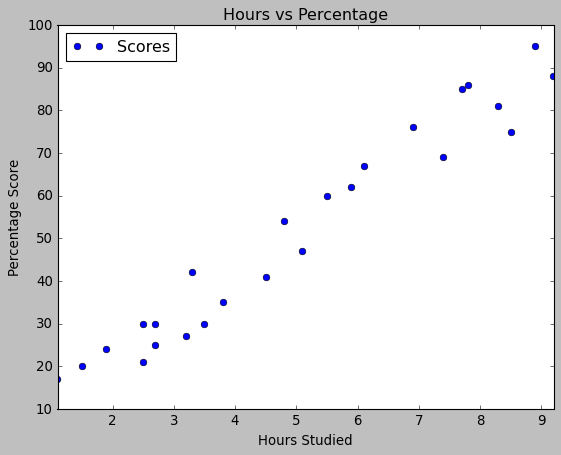

In [16]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Relation between hours spent and percentage is displayed here. Seaborn-paper style is used**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "Target" (outputs).
iloc uses index of column sto extract the values. We are utliisng python slicing noatation to iterate through columns.

In [19]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [40]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Model is trained.")

Model is trained.


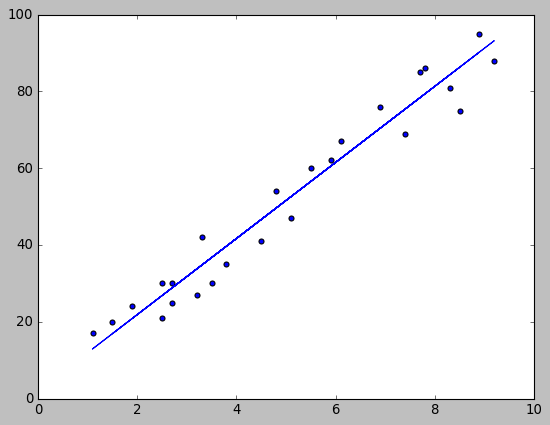

In [41]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [42]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [43]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [77]:
#Making predictions using trained model

inp = float(input("Enter hours studied: "))
y_pred = regressor.predict([[inp]])
s = str(y_pred)
print("Predicted Score: {}" .format(s[2:-2]))

Enter hours studied: 50
Predicted Score: 97.5509840


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [61]:
#Model evluation

from sklearn import metrics

predictions = regressor.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.18385989900298
MSE: 21.598769307217413
RMSE: 4.647447612100368
